# Data Processing

In [54]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [55]:
#reading csv files
df1 = pd.read_csv("/content/drive/MyDrive/datasets/HDFC.csv")
df2 = pd.read_csv("/content/drive/MyDrive/datasets/HDFCBANK.csv")

#there were two csv files of HDFC Bank so concat them
companies = [df1, df2]
  
df = pd.concat(companies)

In [56]:
print(df.shape)

(10612, 15)


In [57]:
# df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10612 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                10612 non-null  object 
 1   Symbol              10612 non-null  object 
 2   Series              10612 non-null  object 
 3   Prev Close          10612 non-null  float64
 4   Open                10612 non-null  float64
 5   High                10612 non-null  float64
 6   Low                 10612 non-null  float64
 7   Last                10612 non-null  float64
 8   Close               10612 non-null  float64
 9   VWAP                10612 non-null  float64
 10  Volume              10612 non-null  int64  
 11  Turnover            10612 non-null  float64
 12  Trades              4912 non-null   float64
 13  Deliverable Volume  9594 non-null   float64
 14  %Deliverble         9594 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.3+

In [58]:
df.head()

Date Symbol Series  ...  Trades  Deliverable Volume  %Deliverble
0  03/01/00   HDFC     EQ  ...     NaN                 NaN          NaN
1  04/01/00   HDFC     EQ  ...     NaN                 NaN          NaN
2  05/01/00   HDFC     EQ  ...     NaN                 NaN          NaN
3  06/01/00   HDFC     EQ  ...     NaN                 NaN          NaN
4  07/01/00   HDFC     EQ  ...     NaN                 NaN          NaN

[5 rows x 15 columns]

# Data Visualisation

##  Average 5 year growth

Average 5 year growth: 2.45


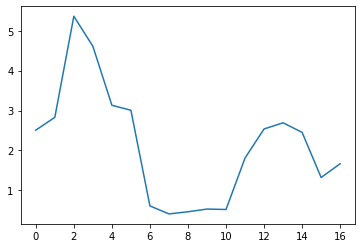

In [59]:
#plotting average 5 year growth w.r.t closing rates
df['year'] = [i[-2:] for i in df['Date']]
df['year'] = df['year'].astype('int')
df_aggr = df.groupby(['year'])['Close'].median().reset_index()
yr = list(df_aggr['year'])
price = list(df_aggr['Close'])
    
growth = []
    
for i,y in enumerate(yr):
    if i+5 <= len(yr)-1:
        g = price[i+5]/price[i]
        growth.append(g)

print("Average 5 year growth:",round(np.median(growth),2))
plt.plot(growth);

## Average 10 years growth

Average 10 year growth: 1.73


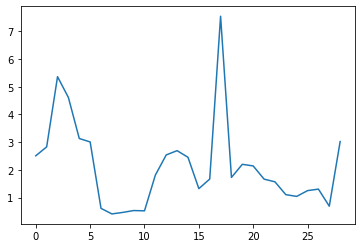

In [60]:
for i,y in enumerate(yr):
    if i+10 <= len(yr)-1:
        g = price[i+10]/price[i]
        growth.append(g)

print("Average 10 year growth:",round(np.median(growth),2))
plt.plot(growth);

## Correaltion Heat Map

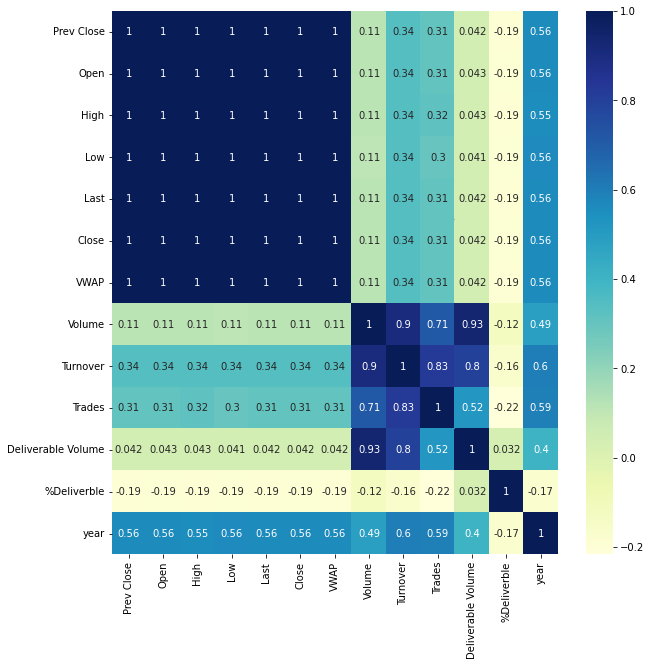

In [61]:
#correlation map
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [62]:
# data = df[['Open','High','Low','Volume','VWAP']]
df.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble"], axis=1, inplace=True)

In [63]:
df.set_index("Date", drop=False, inplace=True)

## Opening Trend of HDFC

In [64]:
df['Open'].plot(figsize=(14, 7))

## Closing Trend of HDFC

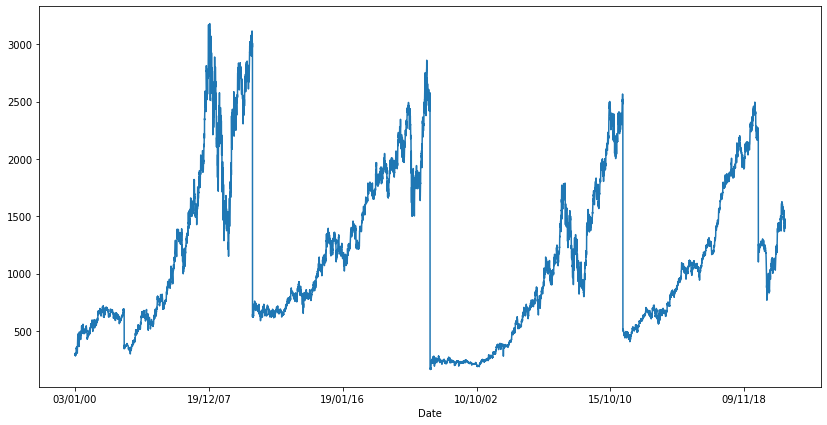

In [65]:
df['Close'].plot(figsize=(14, 7))

## High and Low prices trend of HDFC

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(df2.Date, df2.High)
plt.plot(df2.Date, df2.Low)
plt.title("Trends of HDFC Stock 2019-2021")
plt.xlabel('2019-2021')
plt.ylabel('Price in INR')
plt.legend(['High','Low'])

# Data Preprocessing

## Splitting Date month or day wise

In [ ]:
df['Date']= pd.to_datetime(df['Date'])
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.isocalendar().day
df["day_of_week"] = df.Date.dt.dayofweek
df.drop(['Date'], axis=1, inplace=True)
df


## Scaling numeric columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df)
data = pd.DataFrame(data, index=df.index, columns=df.columns)
df = data
df

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df)
data = pd.DataFrame(data, index=df.index, columns=df.columns)
df = data
df

In [ ]:
sns.pairplot(data = df,
            x_vars = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Volume', 'Turnover'],
            y_vars = 'Close')


## Close is choosen as target variable .

In [ ]:
y = df['Close']
y.index = df.index
df.drop(['VWAP', 'Close'], axis=1, inplace=True)
df

In [ ]:
X = df
X

In [ ]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
(X_test, y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train.head()

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[['Open']])

# Create a first model
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

In [ ]:
lr.summary()

In [ ]:
plt.scatter(X_train_sm.loc[:, 'Open'], y_train)

plt.plot(X_train_sm.loc[:, 'Open'], -0.000201 + 0.988866 * X_train_sm.loc[:, 'Open'], 'r')

plt.show()

In [ ]:
# Add LSTAT to the data and try to rebuild the model

X_train_sm = sm.add_constant(X_train[['Open', 'High']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()


In [ ]:
lr.params

In [ ]:
lr.summary()

In [ ]:
# Lets add all the variables and see

X_train_sm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

In [ ]:
lr.summary()

Looking at the p-values of some of the variables(like Prev Close, Volume, Turnover, year, month, week, day, day_of_week), it is clear that they are not statistically significant.

Lets try to look at VIFs along with this to be sure before dropping any variable from the data.

## Variance Infllation Factor (VIF)
VIF estimates the inflation in regression coefficients due to multicollinearity. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. The numerical value for VIF gives what percentage of variance is inflated for each coefficient. As a thumb rule, VIF greater than 5.0 indicates a highly correlated variable. Therefore, those highly correlated variables must be removed for a good prediction model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
np.round(lr.pvalues, 3)

In [ ]:
X = X_train.copy()

In [ ]:
X = X.drop('day', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

In [ ]:
X = X.drop('week', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

In [ ]:
X = X.drop('Turnover', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

In [ ]:
y_pred= regressor.predict(X_test)  

In [ ]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))  